**This project covers:** Volatility Forecasting of returns for The New Germany Fund (GF) using GARCH

Loading functions used for investigating the dataset

In [2]:
# Creating a function to inspect various aspects of the raw data

from tabulate import tabulate

def data_inspection(df):
  '''
  Description: This function returns basic details about the dataset to perform data inspection:
               1) Rows and columns of the DataFrame
               2) General information about the DataFrame
               3) Number of NULL or missing values in the DataFrame in each column.
  '''
  print("(Rows,Columns) of DataFrame: ",df.shape)  # shape of the data
  print("********************************************************************************")
  print("General Information: \n",tabulate(df.info()))   # general info about the data
  print("********************************************************************************")
  print("# null values in Features: \n\n",df.isnull().sum())     # Number of null values on each column of the data
  print("********************************************************************************")
  #print("Data Statistics (Numerical data): \n",tabulate(df.describe()))   # returns statistical summary of numerical data
  #print("********************************************************************************")
  #print("Data Statistics (Categorical data): \n",tabulate(df.describe(include = object)))   # returns statistical summary of categorical data
  #print("********************************************************************************")

In [3]:
# Function to identify unique value and counts for discrete or categorical data and min max value for continous numerical data

def unique_data(df):
    '''
    Description: unique_data(df) prints unique values and counts present in columns.
                 Features are divided into:
                 Discrete features - Numerical features with less than 10 unique values
                 Continuous features - Numerical features with more than 10 unique values
                 Categorical features - With data type as object

    Input:       The DataFrame for which unique values are required to be printed

    Output:      - Prints value_counts() for Discrete Numerical and Categorcial Features and Min, Max values for Continuous Numerical Features
                 - Returns the list of categorical_features, discrete_features, continuous_features in that order
    '''
    discrete_features = []
    continuous_features = []
    categorical_features = []

    # Iterate through each column in the DataFrame
    for feature in df.columns:
      if df[feature].dtype == object:
        categorical_features.append(feature)
      elif df[feature].nunique() <= 10:
        discrete_features.append(feature)
      else:
        continuous_features.append(feature)

    # Unique values for Discrete Numerical features
    for ft in discrete_features:
      print("Unique values for ", df[ft].value_counts())            # Print the unique values and their counts
      print("********************************************************")  # Print a separator

    # Unique values for Continuous Numerical features
    for ft in continuous_features:
      print(f" (Min,Max) for {ft}: {df[ft].min(), df[ft].max()}")           # Print the unique values and their counts
      print("********************************************************")     # Print a separator

    # Unique values for Categorical non Numerical features
    for ft in categorical_features:
      print("Unique values for ", df[ft].value_counts())            # Print the unique values and their counts
      print("********************************************************")  # Print a separator

    return categorical_features, discrete_features, continuous_features

**NOTE** - The sample stock price data includes stock values from 2014 to 2018. But since there has been a regime shift after 2020 due to Covid, Ukraine war hence using data from 2020 to train the model and make recent stock price predictions for GF fund.

**The decline in the New Germany Fund (GF) stock price after 2021 can be attributed to several factors:**

* **Economic Environment**: The broader economic challenges in Europe, including slow economic growth, inflation concerns, and fluctuating interest rates, have impacted investor sentiment towards European equities, including those held by the New Germany Fund​ (Seeking Alpha)​​ (FinViz)​.

* **Sector Performance**: The fund's performance is heavily tied to the German market and specific sectors such as manufacturing and technology. Germany's manufacturing sector has faced headwinds, including supply chain disruptions and lower demand, which have negatively impacted the fund's holdings​ (FinViz)​.

* **Geopolitical Risks**: Geopolitical events, including the ongoing conflict in Ukraine and its economic ramifications for Europe, have added uncertainty and risk to the market, leading to cautious investment strategies and sell-offs in funds like the New Germany Fund​ (Seeking Alpha)​.

* **Fund-Specific Issues**: The fund itself has faced specific challenges, such as changes in management, adjustments in portfolio strategy, and distribution policies, which can affect its attractiveness to investors​ (FinViz)​.

Overall, these combined factors have contributed to the decline in the New Germany Fund's stock price since 2021.



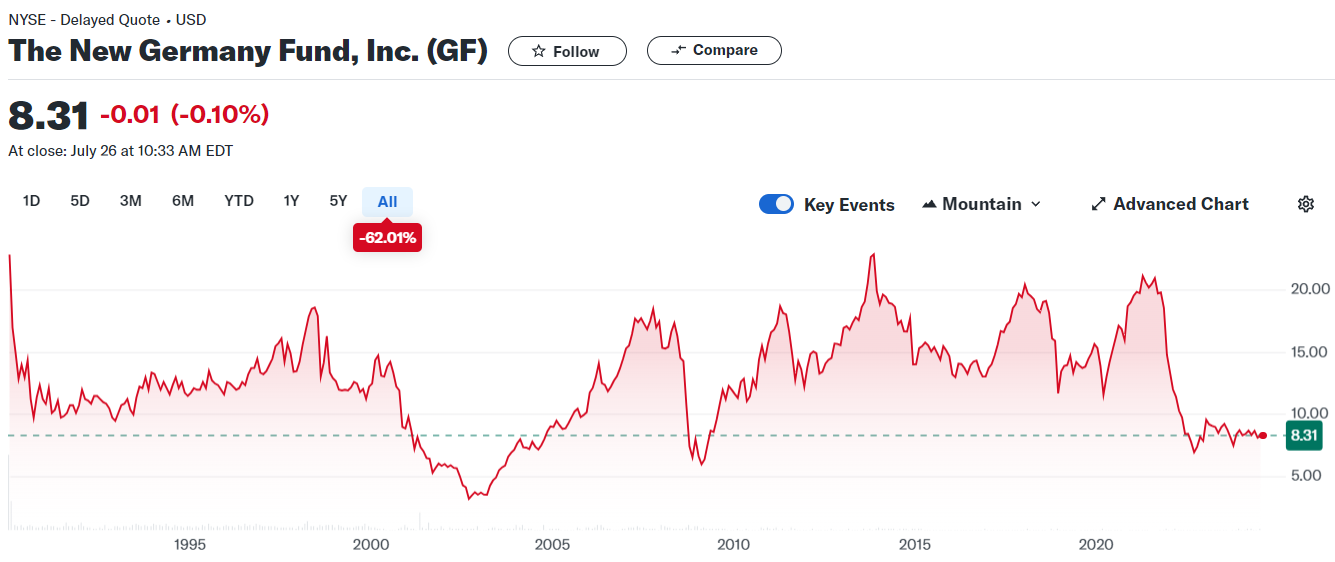




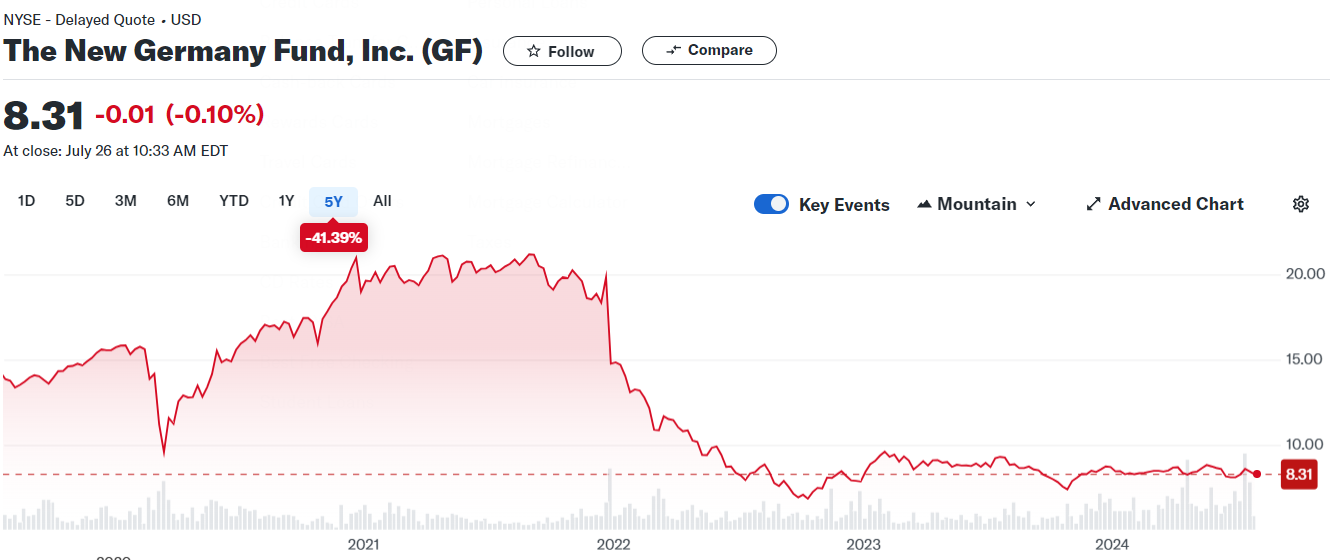


# ***@@ Volatility Forecasting***

Reference:

https://arch.readthedocs.io/en/latest/univariate/introduction.html

https://www.quantstart.com/articles/Generalised-Autoregressive-Conditional-Heteroskedasticity-GARCH-p-q-Models-for-Time-Series-Analysis/

https://theaiquant.medium.com/garch-models-for-volatility-forecasting-a-python-based-guide-d48deb5c7d7b

https://github.com/TRBD/demo_vol_tuning

Backtesting - https://algotrading101.com/learn/backtrader-for-backtesting/  (Backtracder / Zipline)

**Notes:**

- Volatility forecasting plays a crucial role in various financial applications, including risk management, portfolio optimization and derivative pricing.
- **Importance in Financial Markets:** Volatility impacts several aspects of financial markets, including pricing of options, risk management, portfolio construction and asset allocation. Investors and traders use volatility as a gauge of market uncertainty and adjust their strategies accordingly.
- One popular method for Volatility forecasting is **Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model**.
- GARCH models offer a systematic framework for capturing the dynamics of volatility and adjusting for autocorrelation and conditional heteroskedasticity in financial time series data.
- GARCH models incorporate lagged values of the squared residuals (errors) to model the volatility dynamics. By capturing the autocorrelation and conditional volatility clustering, GARCH models can provide more accurate volatility forecasts compared to traditional models.
- With their robust statistical framework and ability to capture the complex dynamics of financial volatility, GARCH models have become a cornerstone of volatility forecasting in quantitative finance.

**Why GARCH Models are Used for Volatility Forecasting:**

1. **Flexibility**: GARCH models allow for flexible modeling of volatility patterns, capturing both short-term volatility spikes and long-term persistence in volatility.
2. **Ability to Capture Volatility Clustering**: Financial data often exhibit periods of high and low volatility clustering. GARCH models are designed to capture these clustering effects, providing more accurate volatility forecasts during turbulent market conditions.
3. **Accommodation of Autocorrelation**: GARCH models can account for the autocorrelation present in financial time series data, improving the accuracy of volatility predictions over time.
4. **Conditional Volatility**: By modeling the conditional variance of the error term, GARCH models provide insights into how volatility changes based on past information, making them valuable for risk management and portfolio optimization.

</br>

- **Model Evaluation**
Model evaluation plays a critical role in assessing the performance and reliability of GARCH models for volatility forecasting. Various techniques are used to gauge the effectiveness of these models, including
1. AIC and BIC criteria
- Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are statistical measures used to evaluate the goodness of fit of a model while penalizing for model complexity.
- Lower values of AIC and BIC indicate a better fit of the model to the data.
- AIC places a higher penalty on model complexity compared to BIC.
- When fitting a GARCH model, we can calculate AIC and BIC to determine the optimal model specification that strikes a balance between model accuracy and complexity.
2. Backtesting
- Backtesting is a technique used to assess the performance of a volatility forecasting model, such as a GARCH model, by comparing predicted values with observed data.
- By analyzing the residuals (difference between predicted and actual volatility), backtesting helps identify potential weaknesses or biases in the model.
- In the context of GARCH models, backtesting involves calculating the squared standardized residuals and analyzing their distribution to check for consistency with assumed model properties.
- Deviations from expected distribution patterns may indicate model inadequacies or limitations.
3. Out-of-sample testing.
- Out-of-sample testing involves evaluating the forecasting performance of a model on data it has not been trained on.
- In the case of GARCH models, this means assessing how well the model forecasts volatility on unseen data.
- This validation technique helps determine the generalizability and robustness of the model in capturing volatility dynamics.
- By splitting the data into training and testing sets, fitting the GARCH model on the training data and then forecasting volatility on the test data, we can measure the accuracy and reliability of the model’s predictions under real-world conditions.

</br>

- ARCH models are a popular class of volatility models that **use observed values of returns or residuals as volatility shocks.**

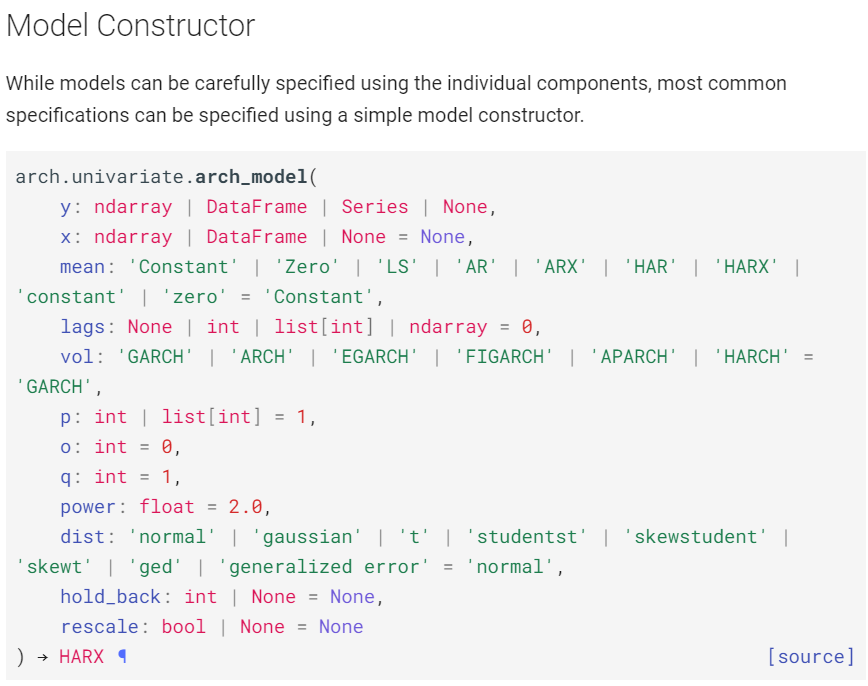



**GARCH(p,q)**

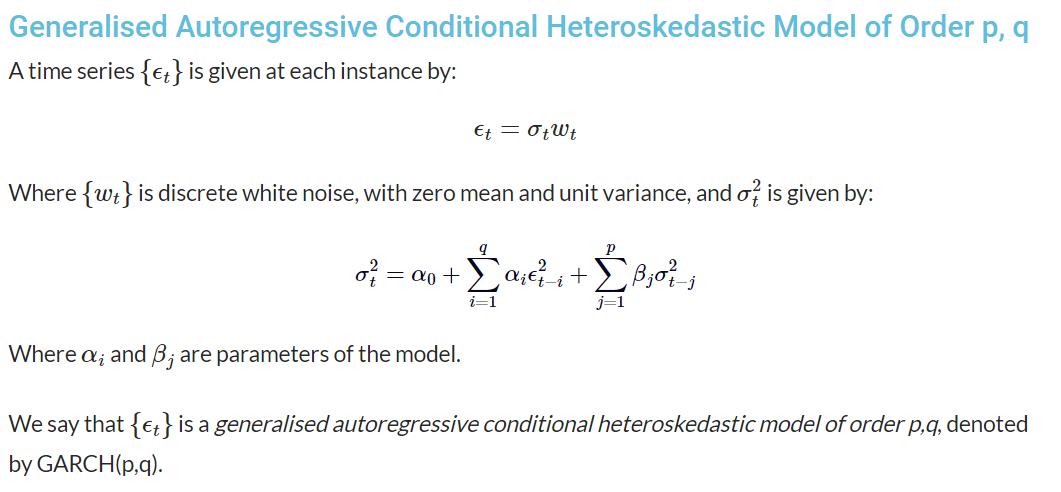


- This definition is similar to that of ARCH(p), with the exception that we are adding moving average terms.
- GARCH is the "ARMA equivalent" of ARCH, which only has an autoregressive component.
- As always we should begin with the simplest possible case of the model, namely GARCH(1,1). This means we are going to consider a single autoregressive lag and a single "moving average" lag.

In [4]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np

!pip install arch           # auto regressive conditional heteroskedasticity
from arch import arch_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 5.3 MB/s eta 0:00:00


## ***1. Loading Data and EDA***

### **Problem Statement:**
- Forecast volatility of GF fund in short term and long term to help guage market uncertainty so investors can modify their strategies accordingly.



In [5]:
# Download data with yfinance
ticker = 'GF'  ## AAPL
start_date = '2010-01-01'
end_date = '2024-04-30'

data = yf.download(ticker, start=start_date, end=end_date)   # 14 years of data

# Load the first few rows of the data
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,12.13,12.37,12.13,12.32,3.677650,28200
2010-01-05,12.40,12.44,12.39,12.41,3.704515,38600
2010-01-06,12.50,12.60,12.50,12.59,3.758247,20000
2010-01-07,12.49,12.66,12.49,12.61,3.764216,21400
2010-01-08,12.60,12.64,12.60,12.62,3.767202,21000


### **Observation on data**

In [6]:
# inspecting the data for shape, null values, and feature format
data_inspection(data)

(Rows,Columns) of DataFrame:  (3604, 6)
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3604 entries, 2010-01-04 to 2024-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3604 non-null   float64
 1   High       3604 non-null   float64
 2   Low        3604 non-null   float64
 3   Close      3604 non-null   float64
 4   Adj Close  3604 non-null   float64
 5   Volume     3604 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 197.1 KB
General Information: 
 
********************************************************************************
# null values in Features: 

 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
********************************************************************************


In [7]:
# identifying unique values in each column
unique_data(data)

 (Min,Max) for Open: (6.820000171661377, 23.989999771118164)
********************************************************
 (Min,Max) for High: (6.940000057220459, 24.270000457763672)
********************************************************
 (Min,Max) for Low: (6.809999942779541, 23.989999771118164)
********************************************************
 (Min,Max) for Close: (6.880000114440918, 24.260000228881836)
********************************************************
 (Min,Max) for Adj Close: (3.1774609088897705, 14.660836219787598)
********************************************************
 (Min,Max) for Volume: (200, 208000)
********************************************************


([], [], ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

### **EDA - Univariate Analysis**

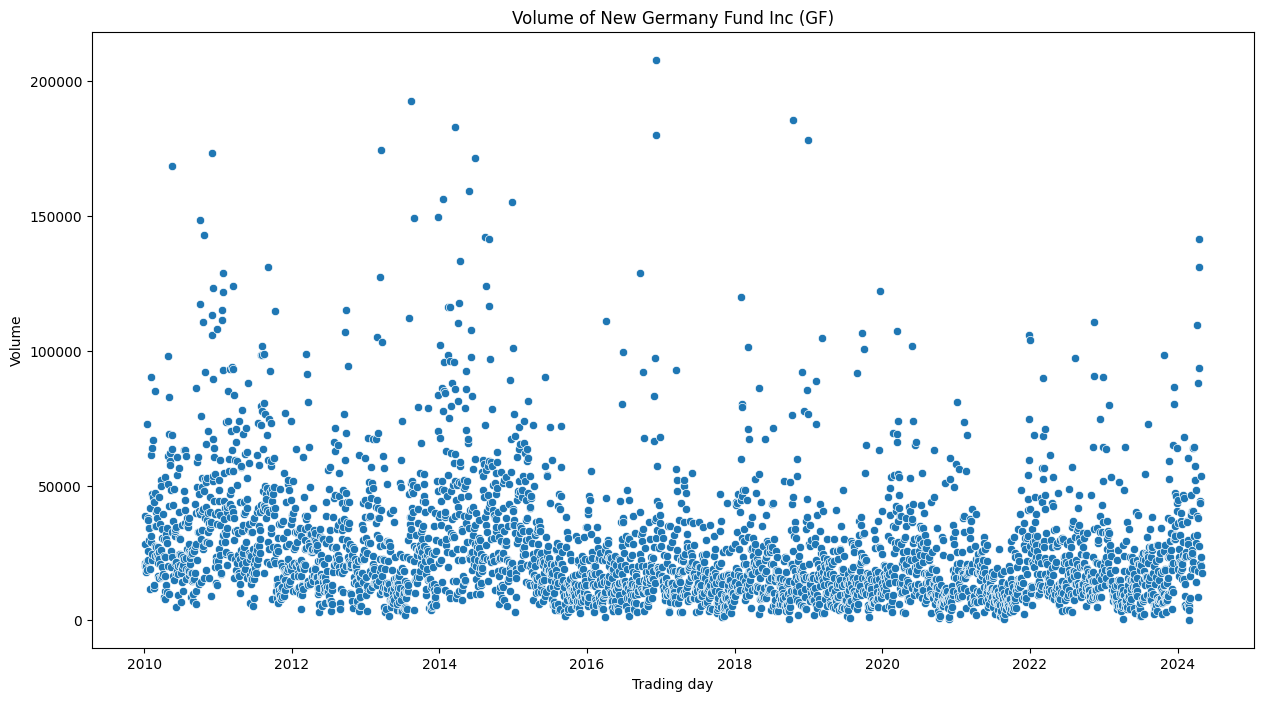

In [8]:
# Plotting hist plot for categorical features
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot
plt.figure(figsize=(15, 8))

# Add title and labels
sns.scatterplot(data, x = data.index, y = 'Volume')
plt.title('Volume of New Germany Fund Inc (GF)')
plt.ylabel("Volume")
plt.xlabel('Trading day')
plt.grid(False)

# Show the plot
plt.show()

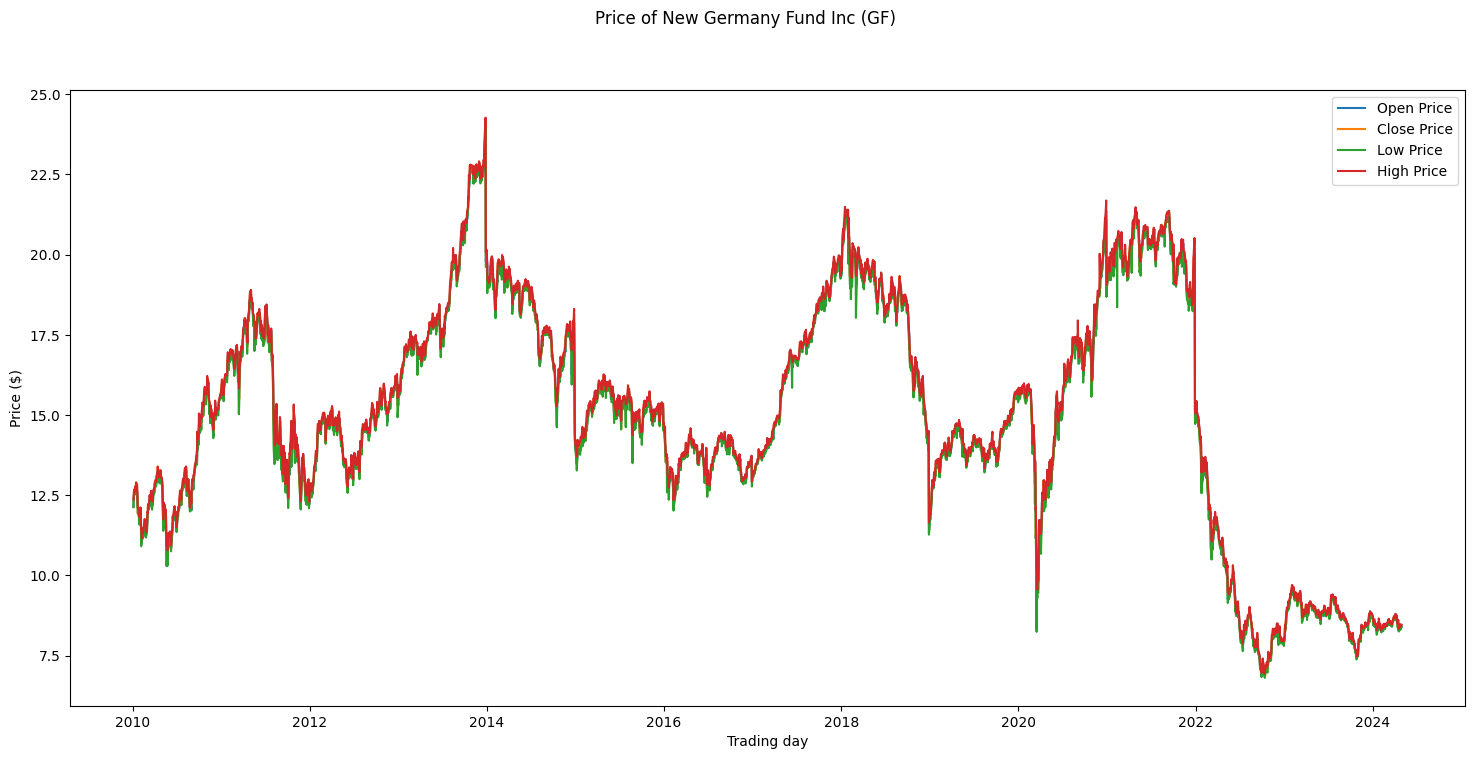

In [9]:
# Plotting Prices of GF fund over time

# Line plot
plt.figure(figsize=(18, 8))

# Add title and labels
plt.plot(data.Open, label = "Open Price")
plt.plot(data.Close, label = "Close Price")
plt.plot(data.Low, label = "Low Price")
plt.plot(data.High, label = "High Price")
plt.legend()
plt.suptitle(f'Price of New Germany Fund Inc (GF)')
plt.ylabel(f'Price ($)')
plt.xlabel('Trading day')
plt.grid(False)

# Show the plot
plt.show()

### **EDA - Bivariate / Multivariate Analysis**

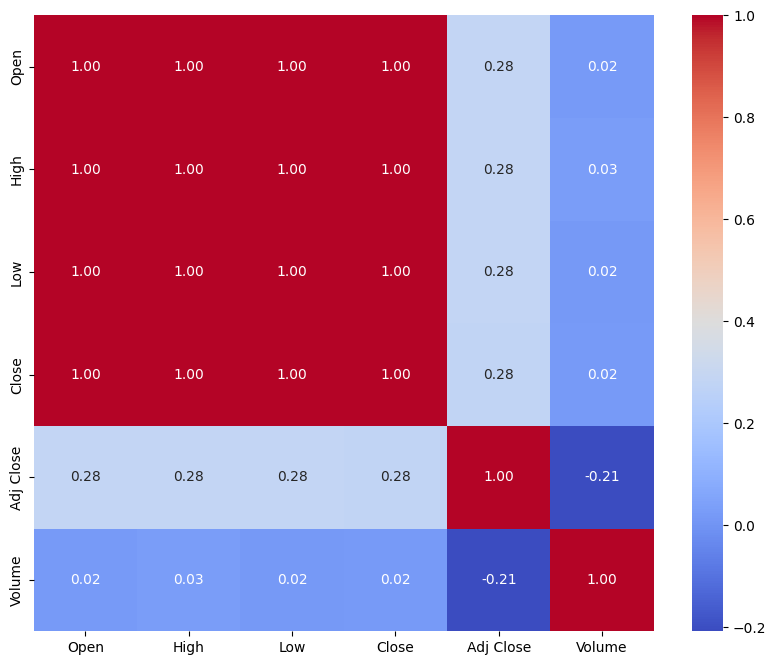

In [10]:
# Using heatmap to identify correlation between numerical data

import seaborn as sns

# Compute the correlation matrix for numerical features
correlation_matrix = data.select_dtypes(include=[np.number]).corr()  # Fill in the blank to compute correlation

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')  # Fill in the blank to plot the heatmap

# Show the plot
plt.show()

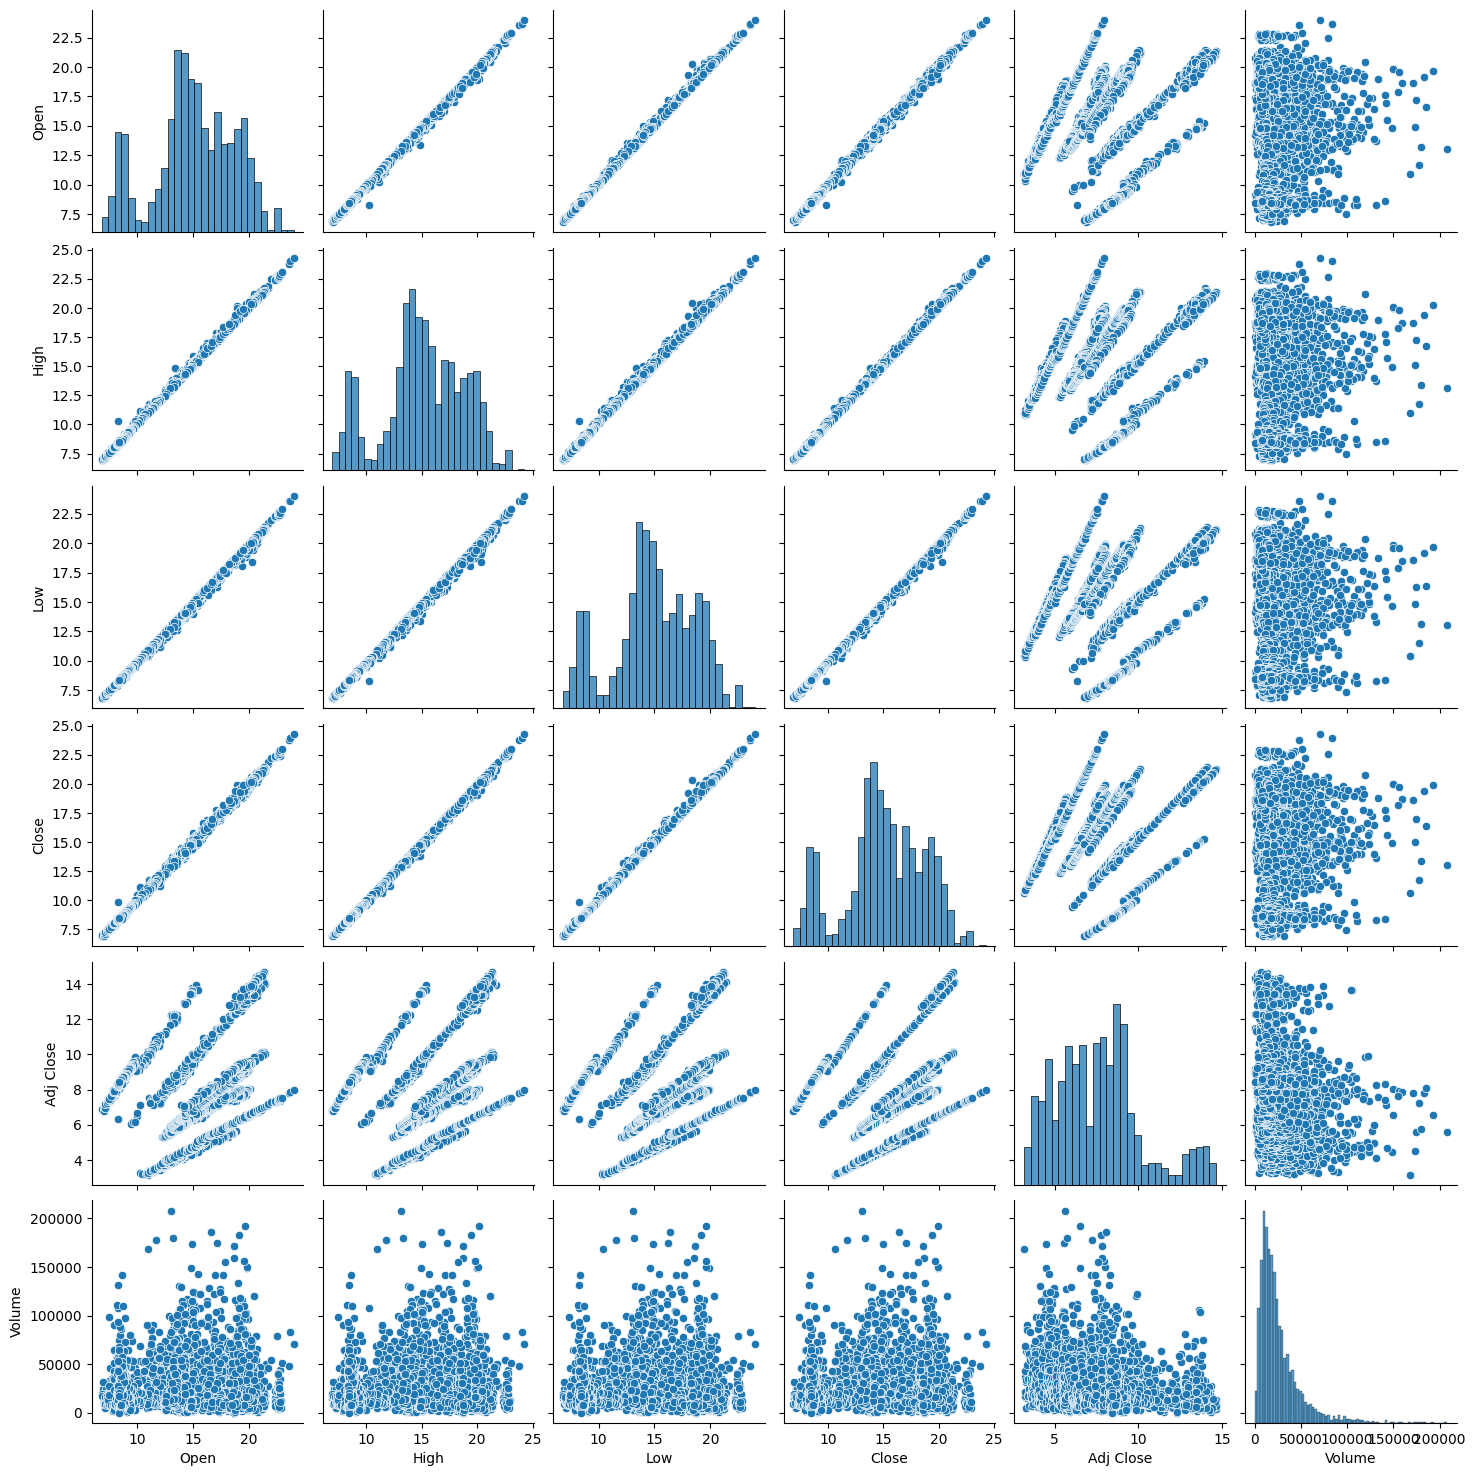

In [11]:
# Plotting pairplot for GF fund data
sns.pairplot(data)

**Comments:**
- Data has 3406 samples, and 6 features.
- There are no null values
- (Min,Max) for Open: (6.820000171661377, 23.989999771118164)
- (Min,Max) for High: (6.940000057220459, 24.270000457763672)
- (Min,Max) for Low: (6.809999942779541, 23.989999771118164)
- (Min,Max) for Close: (6.880000114440918, 24.260000228881836)
- (Min,Max) for Adj Close: (3.1774609088897705, 14.660837173461914)
- (Min,Max) for Volume: (200, 208000)

***Key Insights:***
- Open, High, Low, Close values range from about 6 to 24 implies that stock price for GF fund have had quite a bit of volatility in the past 14 years from 2010 to 2024.
- Since Adj Close varies from the range of stock price, implies there have been corporate actions in the past 14 years.
- Volume was high until 2015, and then the max volume pretty much dropped and dropped further after 2020. (identify the reason)
- GF Fund stock price was highly volatile from 2010 and 2022 and varied between 12.5 to 22.5 but after 2022, stock price has been below 10.
- Correlation between Adj Close and Volume is negative -0.21.
- Correlation between Adj Close and other prices is slightly positive 0.28
- Correlation between Volume and other prices is almost zero 0.02
- Adj Close price and High/Low/Open/Close prices form 4 clusters, can be analysed further by checking Clustering models.

## ***2. Modelling***

### **Data Pre-processing**

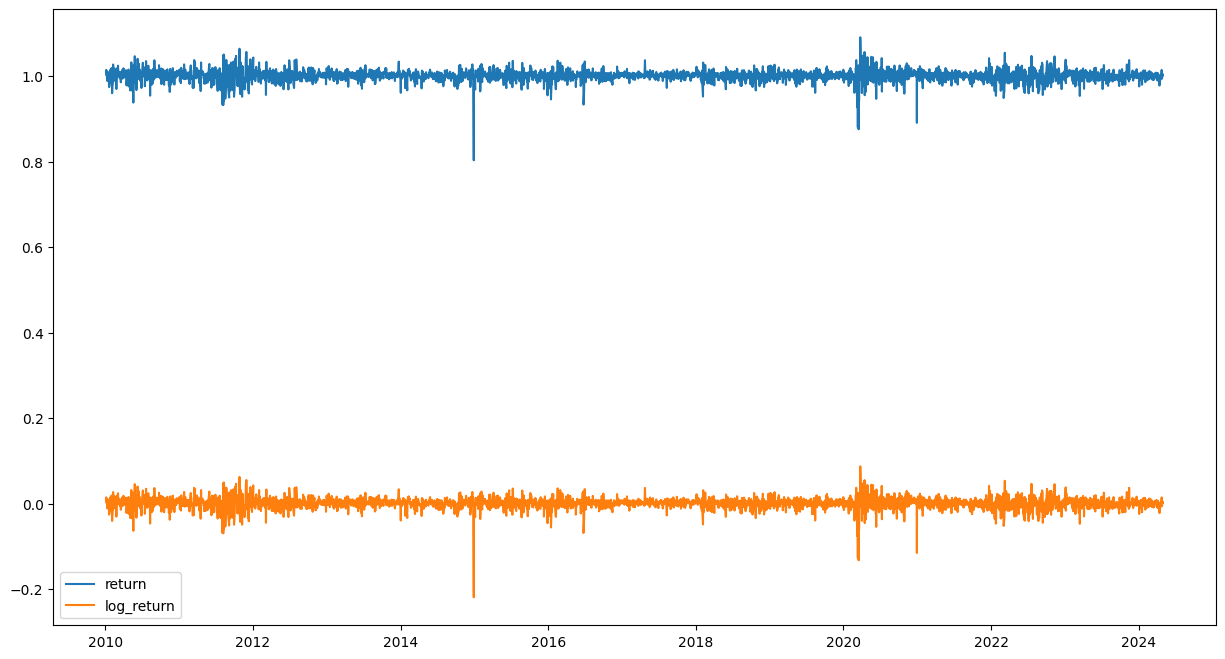

In [12]:
# Graphical representation of difference between normal and log return
normal_return = (data['Adj Close'] / data['Adj Close'].shift(1))
plt.figure(figsize = (15,8))
plt.plot(normal_return, label = "return")
plt.plot(np.log(normal_return), label = "log_return")
plt.legend()
plt.show()

### ***Train test split***

In [13]:
from arch import arch_model

# Calculate log returns
data['log_return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Data preprocessing
returns = data['log_return'].dropna()

In [31]:
print("Total data size:",len(returns))
data_length = len(returns)
train_size = int(0.8 * data_length)
print("Training data size:",train_size)
print("Testung data size:", (len(returns) - train_size))
print(f"Training data from {returns.index[0]} to {returns.index[train_size]}")
print(f"Testing data from {returns.index[train_size+1]} to {returns.index[-1]}")

# train test data split
train_returns = returns[:train_size]
test_returns = returns[train_size:]

Total data size: 3603
Training data size: 2882
Testung data size: 721
Training data from 2010-01-05 00:00:00 to 2021-06-17 00:00:00
Testing data from 2021-06-18 00:00:00 to 2024-04-29 00:00:00


### **Hyper parameter tuning GARCH**

In [32]:
from itertools import product
from tqdm import tqdm_notebook     # Progress bar for loops, iterables, and file operations.

# defining multiple parameters - Set initial values and some bounds
p = np.arange(1, 8)
q = np.arange(1, 8)
#vol = ['GARCH', 'EGARCH', 'FIGARCH']
#mean = ['Zero', 'Constant', 'AR']

# Create a list with all possible combinations of parameters
parameters = product(p, q) # ,vol, mean)         # from itertools - product is used to perform cartesian product, equivalent to a nested for-loop
                                   # product('AB', repeat = 2) = AA AB BA BB
parameters_list = list(parameters)
print("Number of models trained: ", len(parameters_list))

print(parameters_list[:5])

# Train many GARCH models to find the best set of parameters
def optimize_GARCH(data,parameters_list):
    """
        Return dataframe with parameters and corresponding AIC

        data - Series to model
        parameters_list - list with (p, q) tuples
    """
    # If the data input is not a pandas Series then convert it into Series
    # The isinstance() function checks if the object (first argument) is an instance or subclass of classinfo class (second argument).
    if not isinstance(data, pd.Series):
        data = pd.Series(data)

    results = []
    best_aic = float('inf')

    for param in tqdm_notebook(parameters_list):
        # Set model parameters
        p_val = int(param[0])
        q_val = int(param[1])
        vol_val = 'GARCH' #param[2]
        mean_val = 'Zero' #param[3]
        try:
          model = arch_model(data, mean= mean_val, vol= vol_val, p=p_val, q= q_val).fit(disp='off')  # Fit GARCH Model
        except:
            continue

        aic = model.aic     # Akaike Information Criterion (AIC)

        # Save best model, AIC and parameters
        if aic < best_aic:       # Because smaller AIC score is preferable
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    # Check if any models were successfully fitted
    if results:
        result_table = pd.DataFrame(results)
        result_table.columns = ['parameters', 'aic']
        # Sort in ascending order, lower AIC is better
        result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)

        return result_table
    else:
        print("No models were successfully fitted. Check your data and parameter combinations.")
        return None


Number of models trained:  49
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]


In [33]:
# Identify the best parameters for SARIMA model
result_table = optimize_GARCH(train_returns, parameters_list)

<ipython-input-32-c5648e388445>:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameters_list):


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001985. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001985. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarn

In [35]:
# Set parameters that give the lowest AIC (Akaike Information Criteria)
p, q = result_table.parameters[0]
print(f'Best p: ',p)
print(f'Best q: ',q)
#print(f'Best mean model: ',mean)
#print(f'Best volatility model: ',vol)
print(f'Best AIC: ',result_table.aic[0])

Best p:  5
Best q:  2
Best AIC:  -17242.614293676044


In [36]:
result_table.head()

,parameters,aic
0,"(5, 2)",-17242.614294
1,"(7, 2)",-17235.786530
2,"(5, 5)",-17217.090967
3,"(4, 7)",-17194.389318
4,"(4, 1)",-17188.470418


### **Training with best parameters**

In [119]:
print(type(train_returns))

# Standardization
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
# Reshape the Series into a 2D array
returns_2d_train = train_returns.values.reshape(-1, 1)
returns_2d_test = test_returns.values.reshape(-1, 1)

# Fit and transform the data
train_returns_scaled = pd.DataFrame(st.fit_transform(returns_2d_train), columns = ["log_return"])
train_returns_scaled.index = train_returns.index[:]

test_returns_scaled = pd.DataFrame(st.transform(returns_2d_train), columns = ["log_return"])

print(type(train_returns_scaled))
train_returns_scaled.head(2)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,log_return
Date,
2010-01-05,0.483125
2010-01-06,0.988582


In [120]:
# Training GARCH model with best parameters
print(p)
print(q)
#print(vol)
#print(mean)
am = arch_model(train_returns_scaled, mean='Zero', vol='GARCH', p=int(p), q=int(q)) #, rescale=True)
res = am.fit(disp='off')

print(res.summary())

5
2
                       Zero Mean - GARCH Model Results                        
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3634.20
Distribution:                  Normal   AIC:                           7284.40
Method:            Maximum Likelihood   BIC:                           7332.13
                                        No. Observations:                 2882
Date:                Mon, Aug 05 2024   Df Residuals:                     2882
Time:                        10:52:11   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1278  8.786e-02      1.454      0.146 [-

In [121]:
# Forecast volatility
forecasts = res.forecast(horizon= len(test_returns))

# Print the forecasted volatility
print(forecasts.mean.iloc[-1, :])

h.001    0.0
h.002    0.0
h.003    0.0
h.004    0.0
h.005    0.0
        ... 
h.717    0.0
h.718    0.0
h.719    0.0
h.720    0.0
h.721    0.0
Name: 2021-06-16 00:00:00, Length: 721, dtype: float64


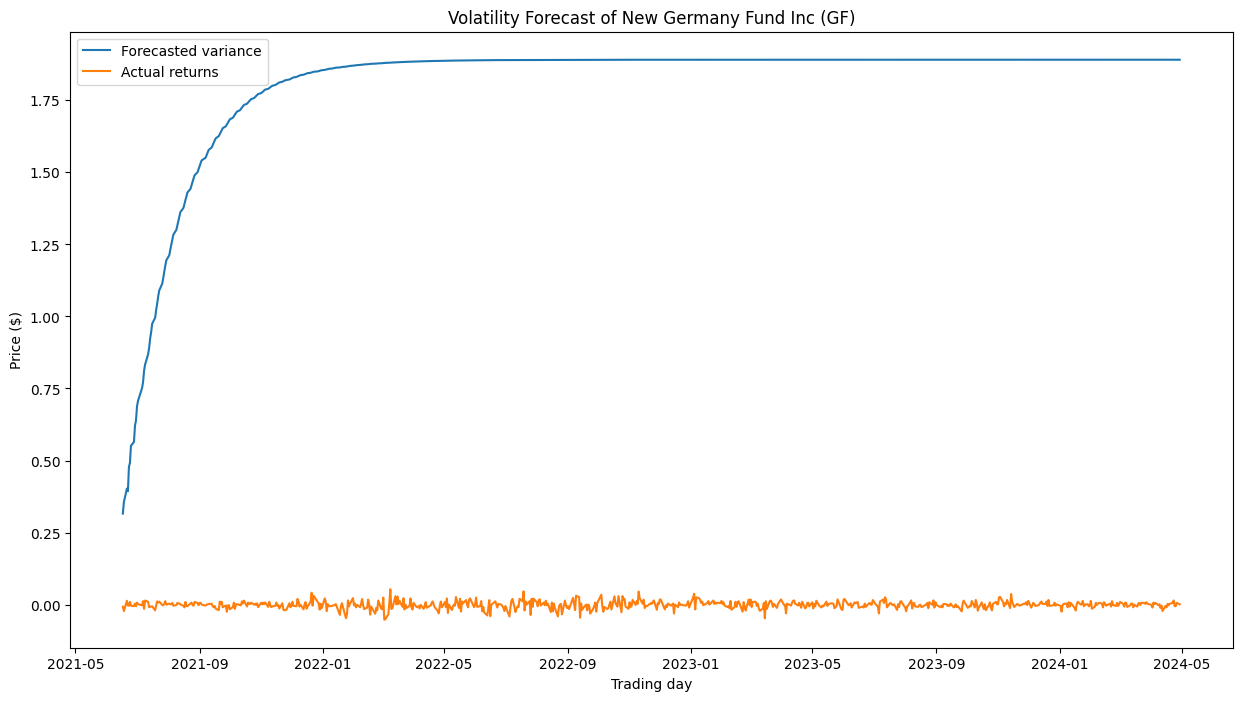

In [122]:
# Plotting Variance of GF fund returns over time

# Line plot
plt.figure(figsize=(15, 8))

# Extract the forecasted volatility values
forecast_values = pd.Series(forecasts.variance.iloc[-1, :].values)
forecast_values.index = test_returns.index

# Add title and labels
plt.plot(forecast_values, label = "Forecasted variance")
plt.plot(test_returns, label = "Actual returns")
plt.legend()
plt.title(f'Volatility Forecast of New Germany Fund Inc (GF)')
plt.ylabel(f'Price ($)')
plt.xlabel('Trading day')
plt.grid(False)

# Show the plot
plt.show()

## ***3. Results Evaluation***

- **result.conditional_volatility** – nobs element array containing the conditional volatility (square root of conditional variance). The values are aligned with the input data so that the value in the t-th position is the variance of t-th error, which is computed using time-(t-1) information.

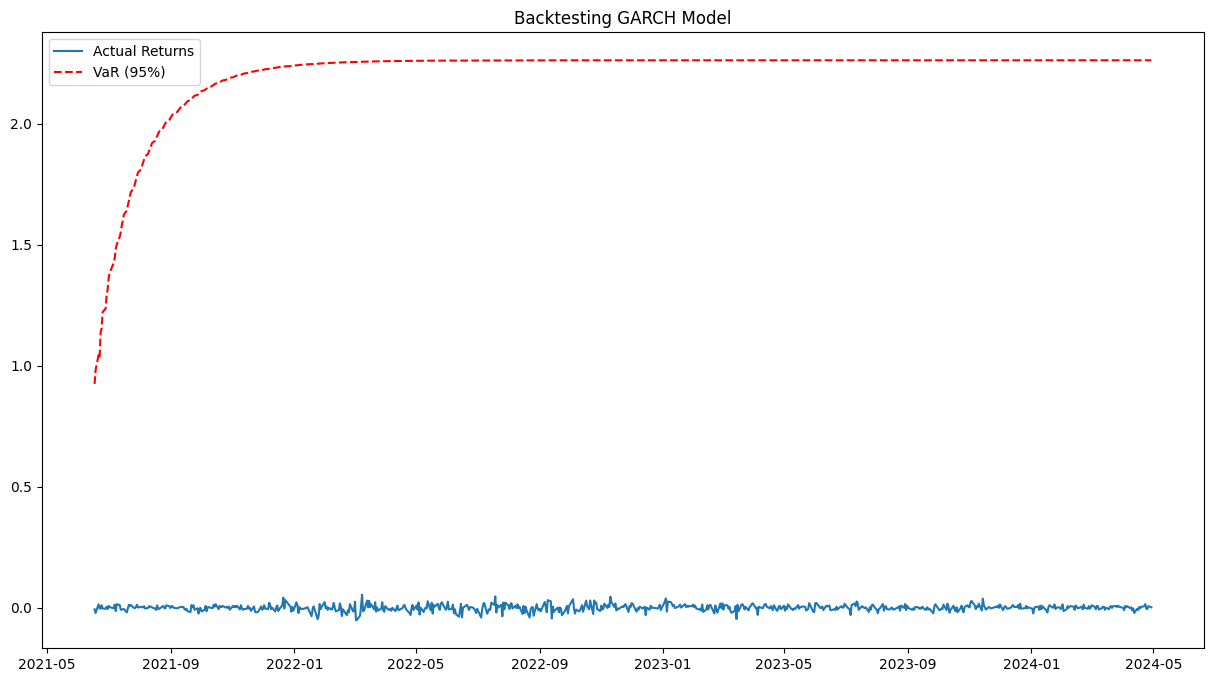

AIC: 7284.401749570194
BIC: 7332.13166778267
Backtest Breach Percentage: 0.0000%


In [163]:
# Data preprocessing to remove NaN or infinite values
import yfinance as yf
import numpy as np
import pandas as pd
from arch import arch_model
import scipy.stats as stats

# drop any null values
data = data.dropna()
# replace any infinity values with null and drop null values
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Define function for model evaluation
def evaluate_model(data):
    '''
    Function evaluate_model(data)
    Input - Testing data that needs to be evaluated
    Output - aic, bic, backtest breach percentage, forecast error
    aic and bic are on the model trained with best parameters
    backtest error, Out of sample forecast error used testing data
    '''
    # Fit GARCH model
    # am = arch_model(data['log_return'], mean='Zero', vol='Garch', p=p, q=q, rescale=True)
    # res = am.fit(disp='off')

    # 1. CALCULATE AIC and BIC - using the model "res" fitted with best parameters
    aic = res.aic
    bic = res.bic

    # 2. PERFORM BACK TESTING --> [(Actual return - Estimated return)/Estimated return]^2
    residuals = data - res.conditional_volatility
    res_t = residuals / res.conditional_volatility
    backtest = (res_t**2).sum()

    # Forecast   # forecasts = res.forecast(horizon=1, start=len(train_returns)) - use "forecasts" from the best fitted model
    forecast_variance = forecasts.variance[-len(data):]
    forecast_returns = forecasts.mean[-len(data):]

    # Calculate VaR - For a given confidence level (e.g., 95%), the VaR can be calculated as
    alpha = 0.05
    z_score = stats.norm.ppf(alpha)
    # Check if forecast_variance is empty and handle it
    if forecast_variance.empty:
      print("Error: 'forecast_variance' is empty. Check your forecasting method.")
      # Add logic here to handle the empty DataFrame, perhaps re-evaluate your model
    else:
      # Extract the forecasted variance values as a Series (assuming it has data now)
      forecast_variance_series = pd.Series(forecasts.variance.T.iloc[:,0])    # UPDATING INDEX USING pd.Series RESULT IN VALUES = NaN
      forecast_variance_series.index = test_returns.index
      # Calculate the VaR based on the forecasted variance
      var = z_score * np.sqrt(forecast_variance_series)  # Use the Series here

      # Backtesting VaR
      # Convert 'var' to a Series with the same index as 'data'
      var_series = pd.Series(-var)
      var_series.index = data.index
      # Compare actual returns with forecasted
      breaches = (test_returns < -var_series).sum()    # checked all values of test returns is less than -var_series
      breach_percentage = breaches / len(data)


    # Plot results
    plt.figure(figsize=(15, 8))
    plt.plot(data, label='Actual Returns')
    plt.plot(-var, color='red', linestyle='--', label='VaR (95%)')
    plt.legend()
    plt.title('Backtesting GARCH Model')
    plt.show()

    # 3. OUT-OF-SAMPLE TESTING

    # fitting the model on training data    # res_oos = am.fit(last_obs=data.index[-1], disp='off')
    # forecast = res.forecast(start=data.index[-1], horizon=len(data)) - use forecasts from best fitted model

    # Calculate out-of-sample forecast error
    forecast_vol = forecasts.residual_variance.iloc[-1, :]
    forecast_error = (data - forecast_vol).dropna()

    return aic, bic, breach_percentage, forecast_error


# Evaluate the GARCH model using log returns data
aic, bic, breach_percentage, forecast_error = evaluate_model(test_returns)

# Print the evaluation results
print(f'AIC: {aic}')
print(f'BIC: {bic}')
print(f"Backtest Breach Percentage: {breach_percentage * 100:.4f}%")

In [140]:
forecast_error.shape

(0,)

## ***4. Insights***

- Open, High, Low, Close values range from about 6 to 24 implies that stock price for GF fund have had quite a bit of volatility in the past 14 years from 2010 to 2024.
- Since Adj Close varies from the range of stock price, implies there have been corporate actions in the past 14 years.
- Volume was high until 2015, and then the max volume pretty much dropped and dropped further after 2020. (identify the reason)
- GF Fund stock price was highly volatile from 2010 and 2022 and varied between 12.5 to 22.5 but after 2022, stock price has been below 10.
- Correlation between Adj Close and Volume is negative -0.21.
- Correlation between Adj Close and other prices is slightly positive 0.28
- Correlation between Volume and other prices is almost zero 0.02
- Adj Close price and High/Low/Open/Close prices form 4 clusters, can be analysed further by checking Clustering models.

### **Model Summary:**

- Scaling of the data is significantly changing the evaluation parameters.

After hyper-parameter tuning of p,q parameters-

>>***On entire dataset***

>***Case 1: Best parameters identified are (tuned p,q)***
- p = 4
- q = 3
- mean = Zero
- vol = GARCH

**On Scaled Data**
- AIC: 9234.965
- BIC: 9284.479
- Backtesting Result: 3600.728

**On unscaled Data**
- AIC: -21516.595
- BIC: -21467.081
- Backtesting Result: 6921.678

>***Case 2: Best parameters identified are (tuned p,q,vol,mean)***
- p = 7
- q = 6
- mean = Constant
- vol = EGARCH

**On Scaled Data**
- AIC: 9171.548
- BIC: 9264.387
- Backtesting Result: 3600.163

**On unscaled Data**
- AIC: -21617.514
- BIC: -21524.675
- Backtesting Result: 7025.086

>>***On Out of Sample testing data***

- AIC: 7284.402
- BIC: 7332.132
- Backtest Breach Percentage: 0.0000%


***Best model is a Zero Mean - GARCH model with 4 autoregressive lags and 3 moving average lags***





## ***5. Recommendation***

- Check clustering algorithm like K-means++, Gaussian Mixture models to identify if Adj Close forms a cluster along with say Closing price of the stock.
- Use variations of GARCH, such as EGARCH, FIGARCH to check which model performs better and fits well with the data.
- In the realm of volatility forecasting, advanced topics like multivariate GARCH models, volatility clustering and long-range dependence are crucial to capturing the intricate dynamics of financial markets.

</br>

1. **Multivariate GARCH Models:**

- Multivariate GARCH models extend the univariate GARCH framework to incorporate correlations and dependencies across multiple assets or variables.
- By considering the interrelationships between different assets, multivariate GARCH models offer a more comprehensive approach to volatility forecasting.
- These models are particularly useful in portfolio optimization and risk management, where the interactions between asset returns play a significant role.

2. **Volatility Clustering:**

- Volatility clustering refers to the phenomenon where periods of high volatility tend to occur in clusters, followed by periods of relative calmness.
- This clustering effect is prevalent in financial markets due to the inherent nature of market dynamics.
- GARCH models excel at capturing volatility clustering by incorporating lagged volatility information and adjusting for autocorrelation in volatility shocks.
- Understanding volatility clustering is essential for anticipating market turbulence and adjusting risk management strategies accordingly.

3. **Long-Range Dependence:**

- Long-range dependence in volatility forecasting refers to the persistence of volatility shocks over extended periods of time. This property implies that past volatility fluctuations can have a lasting impact on future volatility levels.
- GARCH models with long memory components, such as the FIGARCH model, are adept at capturing long-range dependence in volatility.
- By accounting for these persistent volatility shocks, analysts can obtain more accurate forecasts of future volatility behavior.

1. Data Preparation
- Historical Data: Gather historical time series data (e.g., stock prices, returns).
- Splitting Data: Divide the data into an in-sample (training) period and an out-of-sample (testing) period. The in-sample period is used to fit the GARCH model, while the out-of-sample period is used for backtesting.

2. Fit the GARCH Model
- Fit the GARCH model on the in-sample data to estimate the parameters.
- Use software or libraries such as arch in Python or rugarch in R to fit the model.

3. Generate Forecasts
- Use the fitted model to forecast the conditional variances and returns for the out-of-sample period.
- Depending on the software, you can usually specify the forecast horizon.

4. Calculate Value-at-Risk (VaR)
- Calculate the VaR based on the forecasted variance. VaR is a common risk measure used in backtesting.

5. Backtesting the VaR
- Compare the actual returns with the forecasted VaR.
- Count the number of times the actual return exceeds the forecasted VaR (known as VaR breaches).

6. Evaluate the Model Performance
- Calculate the percentage of VaR breaches.
- A well-calibrated model should have a breach percentage close to the chosen confidence level (e.g., ~5% for 95% confidence).

7. Visualize the Results
- Plot the actual returns and the forecasted VaR to visualize the model's performance.

In [ ]:
# Backtesting

'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
import scipy.stats as stats

# Load data (example with synthetic data)
np.random.seed(42)
data = np.random.randn(1000)  # replace with actual data
train_data = data[:800]
test_data = data[800:]

# Fit GARCH(1,1) model
model = arch_model(train_data, vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')

# Forecast
forecasts = garch_fit.forecast(horizon=1, start=len(train_data))
forecast_variance = forecasts.variance[-len(test_data):]
forecast_returns = forecasts.mean[-len(test_data):]

# Calculate VaR - For a given confidence level (e.g., 95%), the VaR can be calculated as
alpha = 0.05
z_score = stats.norm.ppf(alpha)
var = z_score * np.sqrt(forecast_variance)

# Backtesting VaR
breaches = (test_data < -var).sum()
breach_percentage = breaches / len(test_data)

# Print results
print(f"Breach Percentage: {breach_percentage * 100:.2f}%")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(test_data, label='Actual Returns')
plt.plot(-var, color='red', linestyle='--', label='VaR (95%)')
plt.legend()
plt.title('Backtesting GARCH Model')
plt.show()

'''